<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/StressLevelPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('/content/sample_data/Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [68]:
df.columns

Index(['Humidity', 'Temperature', 'Step_count', 'Stress_Level'], dtype='object')

In [69]:
df.shape

(2001, 4)

In [70]:
df.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [72]:
df.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

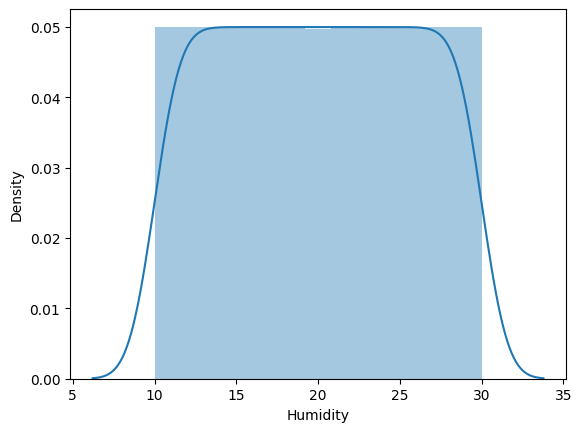

In [74]:
sns.distplot(df['Humidity']);

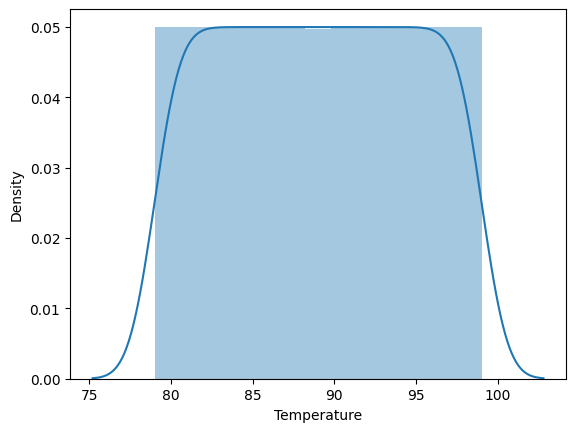

In [75]:
sns.distplot(df['Temperature']);

<img src='https://i.pinimg.com/736x/41/a2/a5/41a2a560f6af4ea3e04b487ad9710e2c.jpg'><br>
Fine... Fine...

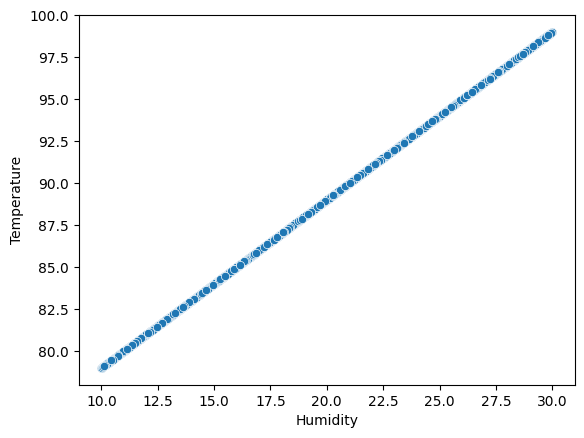

In [76]:
sns.scatterplot(data=df, x='Humidity', y='Temperature');

<img src='https://i.redd.it/v4ubemsm6ptb1.jpg' width=23%><br>
Ladies And Gentlemen...<br>
This data is not real

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [78]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

In [79]:
scaler = MinMaxScaler((0, 1))

In [80]:
X = scaler.fit_transform(X)

In [81]:
y = np.array(y)

In [82]:
X, y = shuffle(X, y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
print(f'{X_train.shape}----{y_train.shape}\n{"="*60}')
print(f'{X_test.shape}----{y_test.shape}\n{"="*60}')

(1600, 3)----(1600,)
(401, 3)----(401,)


In [85]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [86]:
input_shape = [X.shape[1]]

In [87]:
model = Sequential([
    layers.Dense(units=10, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Dense(units=10, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='relu')

])

In [88]:
model.compile(
    optimizer='adam',
    loss='msle'
)

In [89]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=256,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
5/5 - 1s - loss: 0.5581 - val_loss: 0.6656 - 635ms/epoch - 127ms/step
Epoch 2/50
5/5 - 0s - loss: 0.5375 - val_loss: 0.6338 - 27ms/epoch - 5ms/step
Epoch 3/50
5/5 - 0s - loss: 0.5004 - val_loss: 0.5483 - 28ms/epoch - 6ms/step
Epoch 4/50
5/5 - 0s - loss: 0.4528 - val_loss: 0.4533 - 27ms/epoch - 5ms/step
Epoch 5/50
5/5 - 0s - loss: 0.3958 - val_loss: 0.3734 - 32ms/epoch - 6ms/step
Epoch 6/50
5/5 - 0s - loss: 0.3437 - val_loss: 0.3083 - 30ms/epoch - 6ms/step
Epoch 7/50
5/5 - 0s - loss: 0.3083 - val_loss: 0.2557 - 36ms/epoch - 7ms/step
Epoch 8/50
5/5 - 0s - loss: 0.2617 - val_loss: 0.2137 - 29ms/epoch - 6ms/step
Epoch 9/50
5/5 - 0s - loss: 0.2232 - val_loss: 0.1802 - 28ms/epoch - 6ms/step
Epoch 10/50
5/5 - 0s - loss: 0.2028 - val_loss: 0.1535 - 30ms/epoch - 6ms/step
Epoch 11/50
5/5 - 0s - loss: 0.1848 - val_loss: 0.1331 - 32ms/epoch - 6ms/step
Epoch 12/50
5/5 - 0s - loss: 0.1647 - val_loss: 0.1172 - 31ms/epoch - 6ms/step
Epoch 13/50
5/5 - 0s - loss: 0.1391 - val_loss: 0.1045 - 2

In [90]:
pred = model.predict(X_test)

13/13 [==============================] - 0s 6ms/step


In [92]:
pred[:5]

array([[1.9722632 ],
       [0.63570625],
       [1.5467691 ],
       [0.96783185],
       [0.29481447]], dtype=float32)

In [93]:
y_test[:5]

array([2, 1, 2, 1, 0])

In [94]:
from sklearn.metrics import mean_squared_error

In [96]:
mean_squared_error(y_test, pred)

0.10245220645199461

<img src='https://media.tenor.com/cS9NkvTBKtAAAAAd/pulp-fiction.gif'>